<a href="https://colab.research.google.com/github/kwanhong66/KaggleShoveling/blob/master/EDA_To_Prediction(DieTanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle kernal transcription study #1
### EDAT To Prediction(DieTanic)

- Kernal 주소
  * https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- Competition 주소
  * https://www.kaggle.com/c/titanic

## Dataset with Kaggle API

In [0]:
!pip3 install -q kaggle

In [0]:
# from google.colab import files
# files.upload()

In [3]:
!wget 'https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json'

--2020-02-01 14:13:56--  https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2020-02-01 14:14:01 (10.2 MB/s) - ‘kaggle.json’ saved [63/63]



In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions list

ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2375           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      16036            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       5091            True  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        373           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research          Knowledge         63           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       5603           False  


In [7]:
!kaggle competitions download 'titanic'

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.84MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 49.3MB/s]


In [0]:
!mkdir input

In [0]:
!cp /content/train.csv /content/test.csv /content/gender_submission.csv /content/input

## Contents of the notebook:

**Part1: Exploratory Data Analysis(EDA)**

1) Analysis of the features.

2) Finding andy relations or trending considering multiple features

\
**Part2: Feature Engineering and Data Cleaning**

1) Adding any new features

2) Removing redundant features

3) Converting features into suitable form for modeling

\
**Part3: Predictive Modeling**

1) Running Basic Algorithms

2) Cross Validation

3) Ensembling

4) Important Features Extraction

## Part1: Exploratory Data Analysis(EDA)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
data = pd.read_csv('input/train.csv')

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** column have null values

### How many survived?

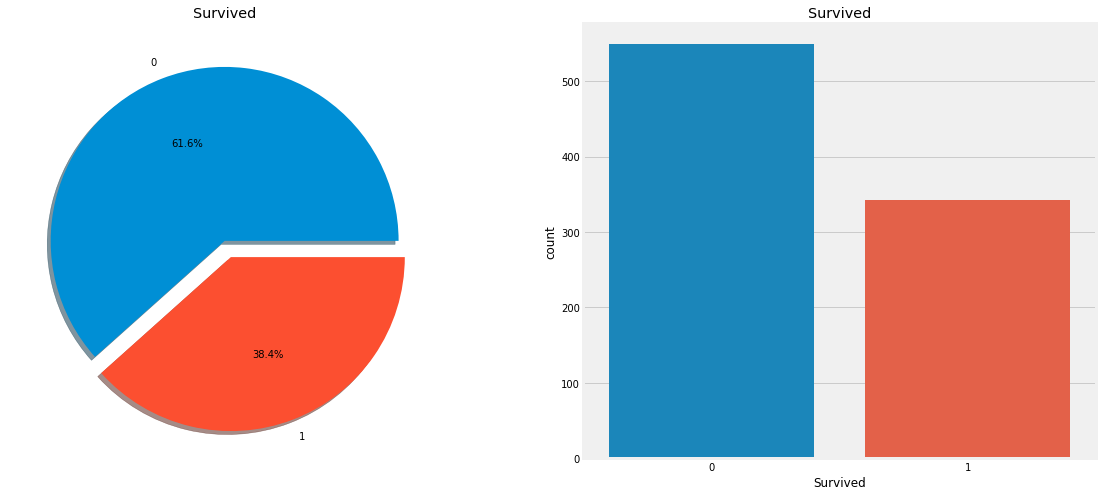

In [14]:
# subplot(nrows, ncols, index, **kwargs)
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

# Creates four polar axes, and accesses them through the returned array
# fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
# axes[0, 0].plot(x, y)
# axes[1, 1].scatter(x, y)

f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', 
                                         ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Type of features

**Categorical Features:**

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

\
**Categorical Features in the dataset: Sex,Embarked.**

\
**Ordinal Features:**

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

\
**Ordinal Features in the dataset: PClass**

\
**Continous Feature:**
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

### Analysing the features

#### Sex -> Categorical Feature

In [15]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

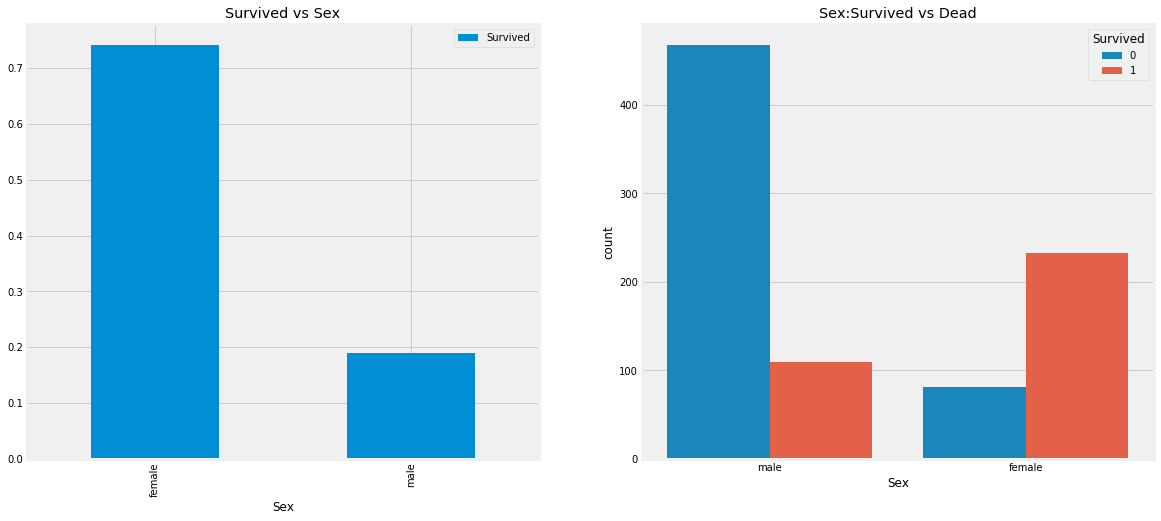

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# data[['Sex', 'Survived']].groupby('Sex').mean().plot(kind='bar', ax=ax[0])
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', data=data, hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Pclass -> Ordinal Feature

In [17]:
# https://3months.tistory.com/194
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


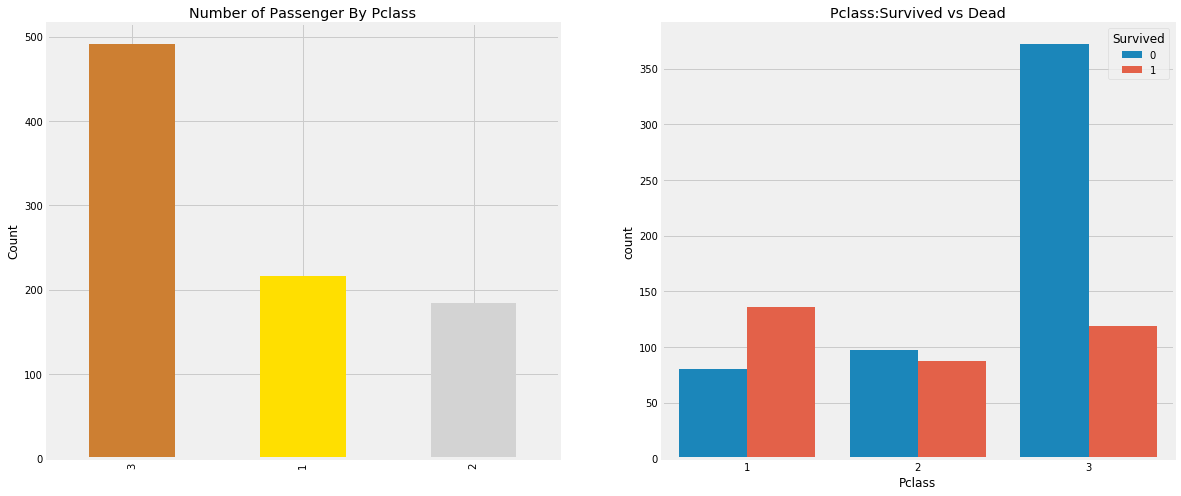

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', data=data, hue='Survived', ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [19]:
pd.crosstab([data.Sex, data.Pclass], data.Survived, margins=True).style.background_gradient(cmap='summer_r')

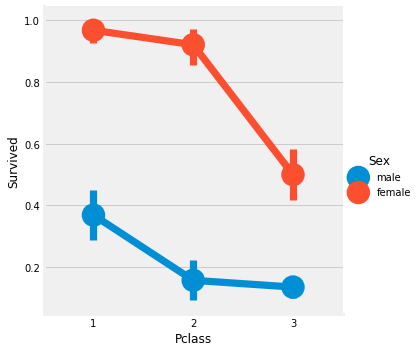

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
# sns.catplot('Pclass', 'Survived', hue='Sex', data=data)

#### Age -> Continuous Feature

In [21]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


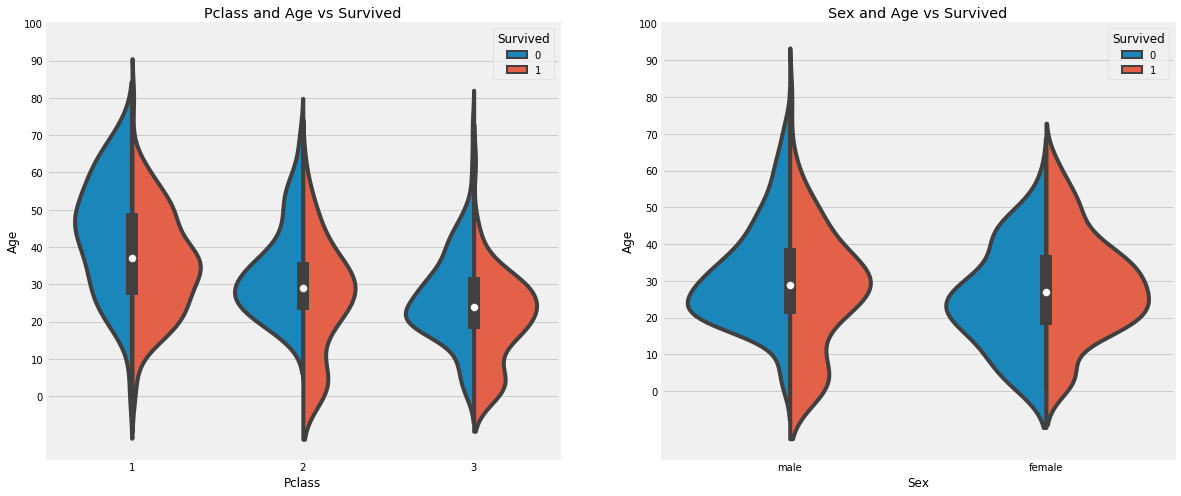

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [0]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

In [24]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                        inplace=True)

In [26]:
data.groupby('Initial').Age.mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NaN Ages

In [0]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [28]:
data.Age.isnull().any() # So no null values left finally

False

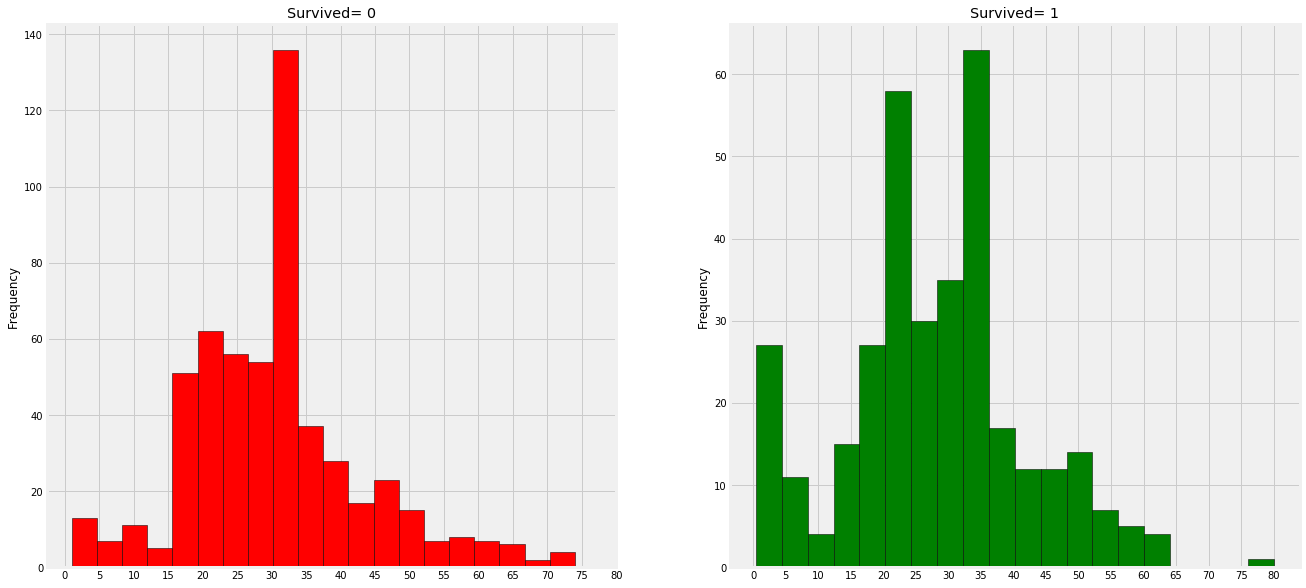

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

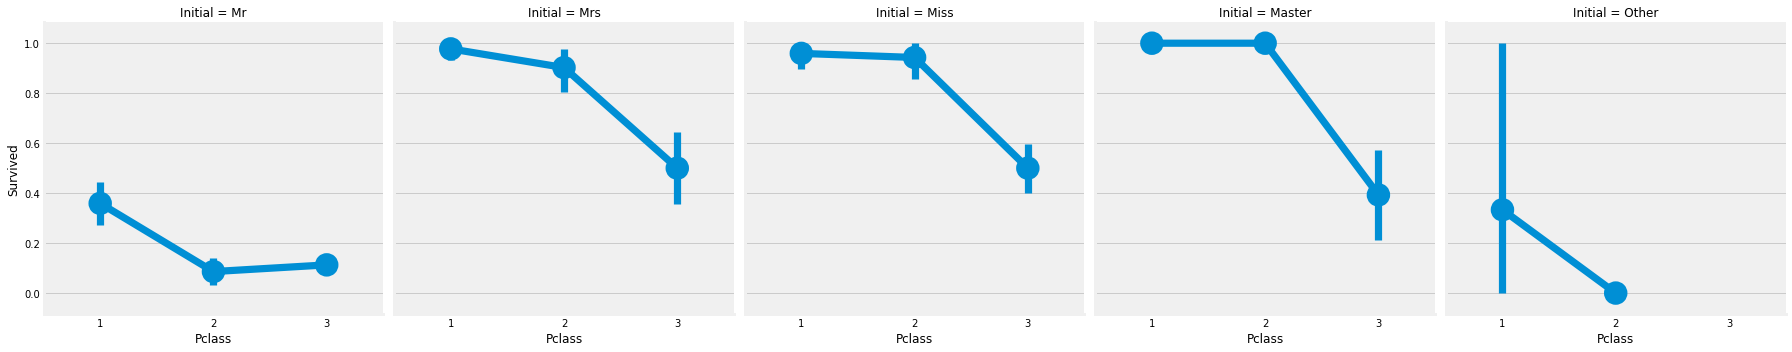

In [30]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

#### Embarked -> Categorical Value

In [31]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port of Embarkation

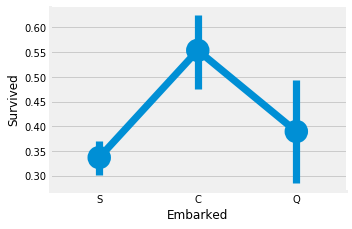

In [32]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

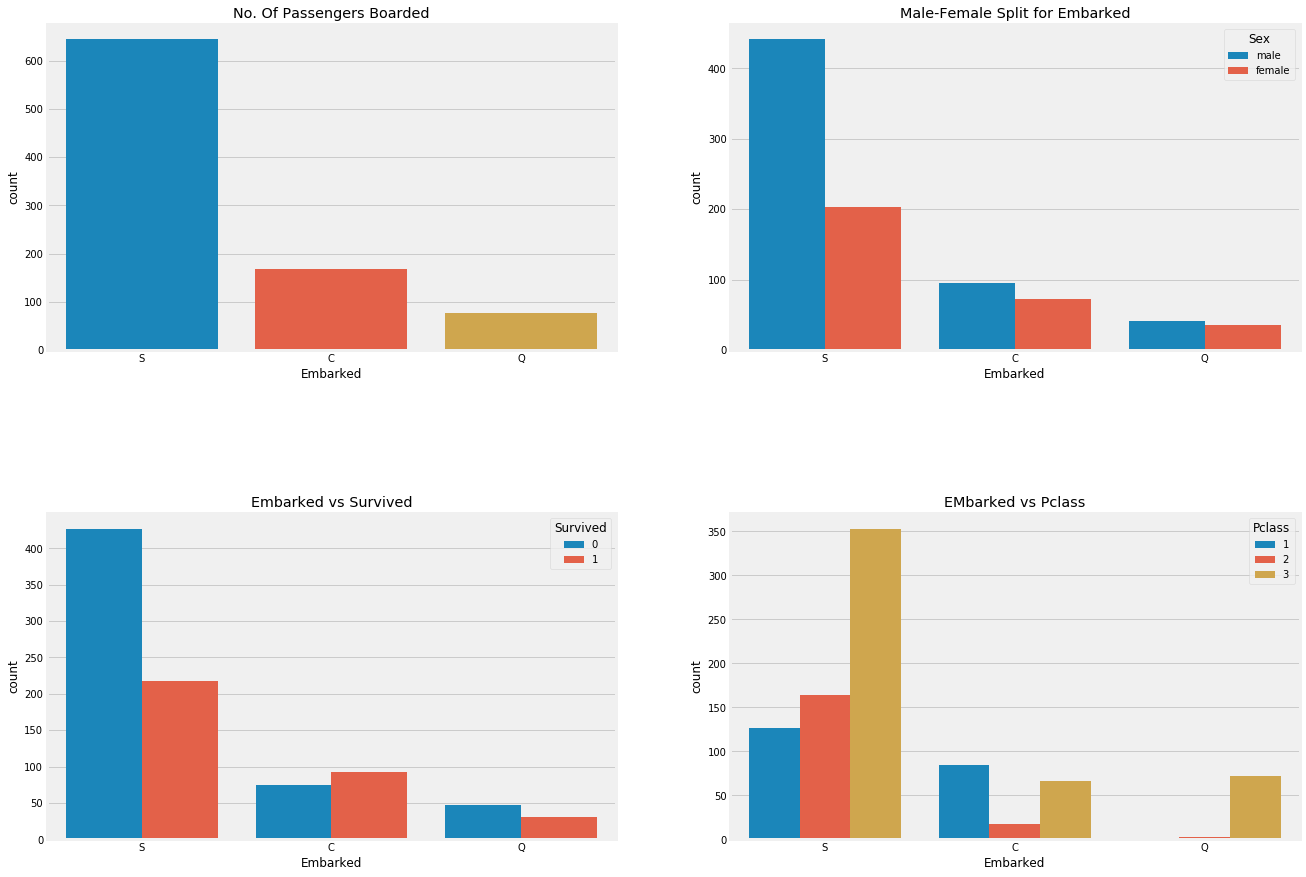

In [33]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1, 1].set_title('EMbarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

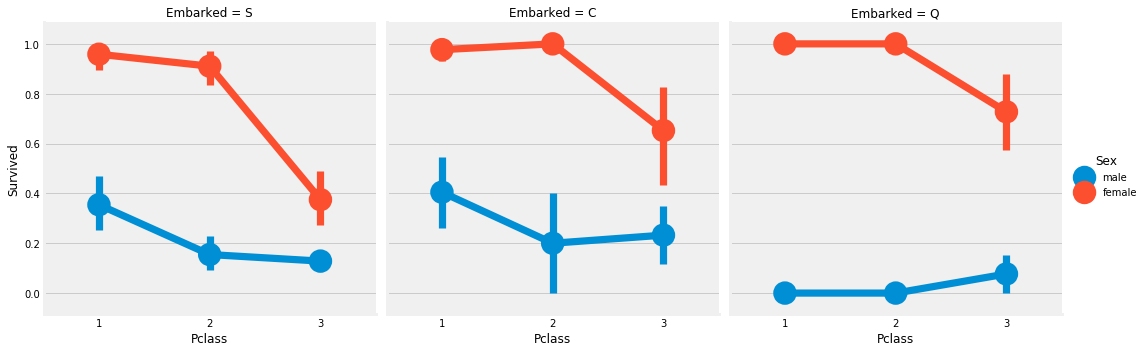

In [34]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

Filling Embarked NaN

In [0]:
data['Embarked'].fillna('S', inplace=True)

In [36]:
data.Embarked.isnull().any() # Finally No NaN values

False

#### SibSp -> Discrete Feature

In [37]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


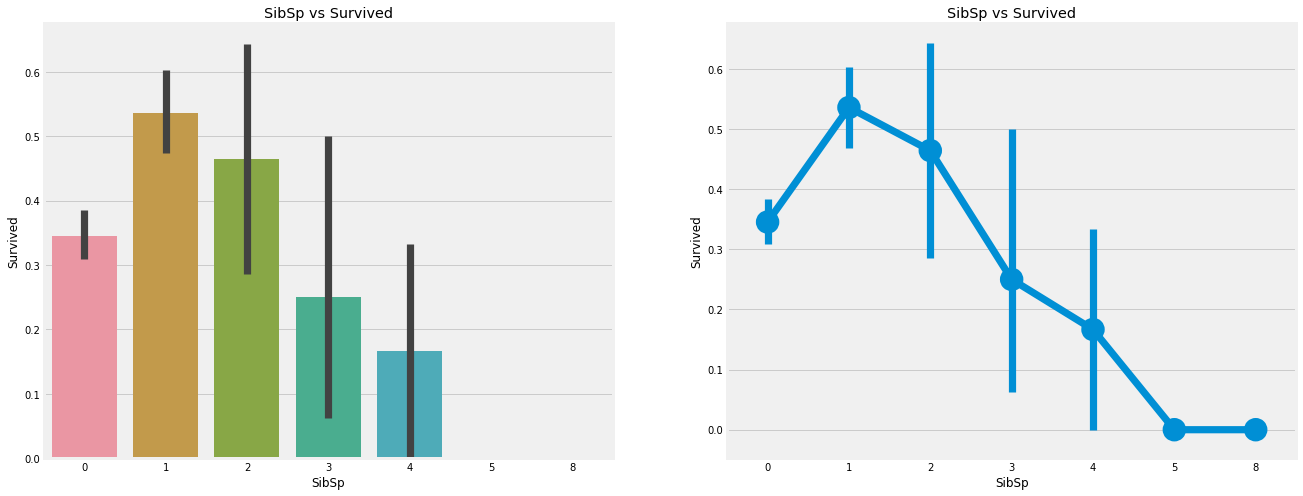

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [39]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Parch

In [40]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


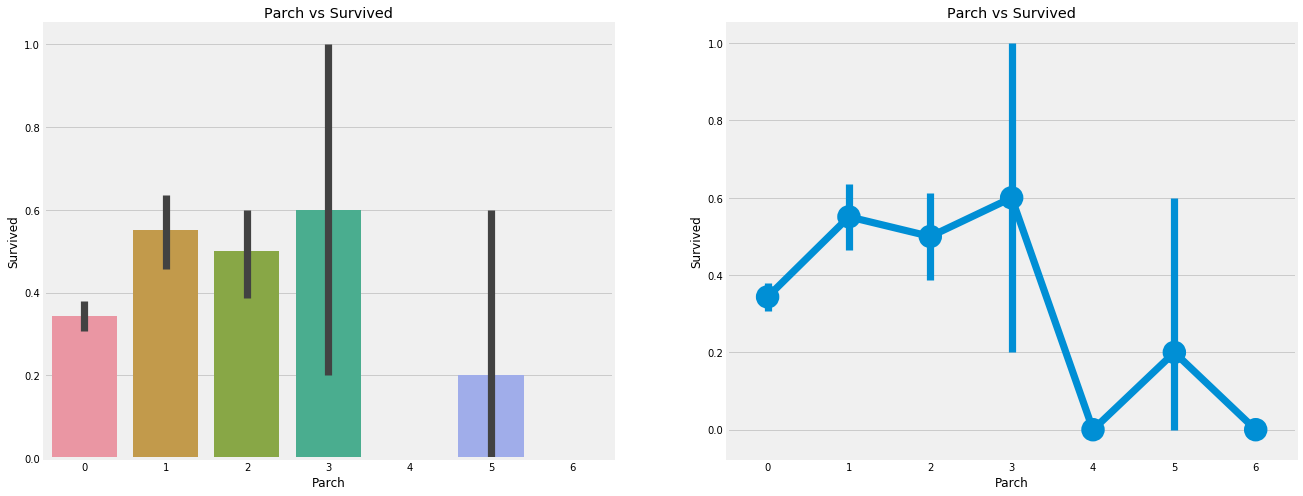

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### Fare -> Continous Feature

In [42]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


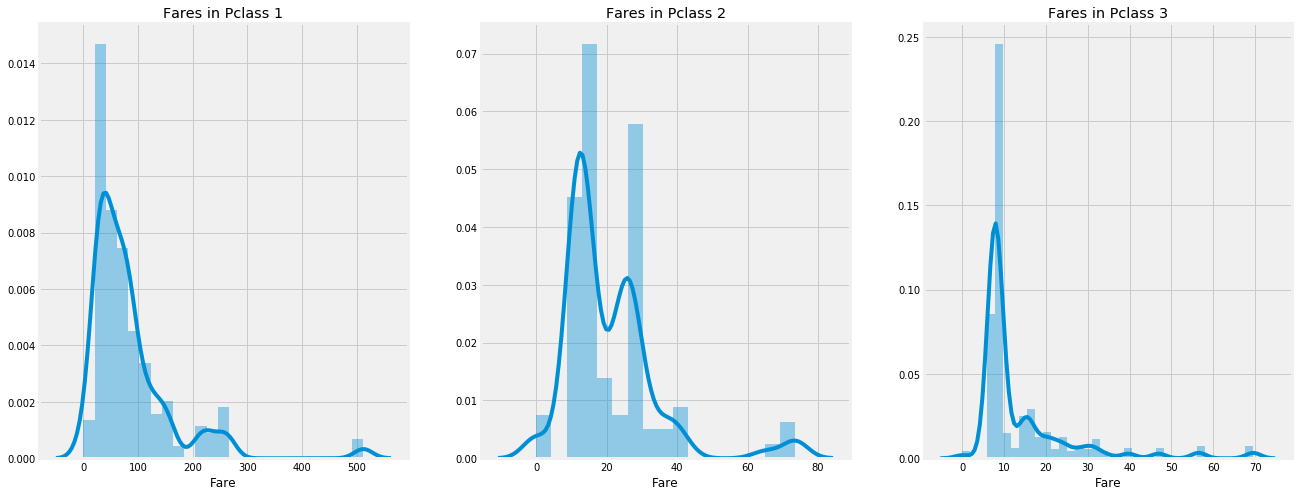

In [43]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### Observations in a Nutshell for all features

**Sex**: The chance of survival for women is high as compared to men.


**Pclass**: There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for **Pclass3 is very low**. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Plcass2.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass 1 passengers got up at S.** Passengers at Q were all from Pclass3.

**Parch+SibSp**: Having 1-2 sibilings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large family travelling with you.


### Corrleation Between The Features

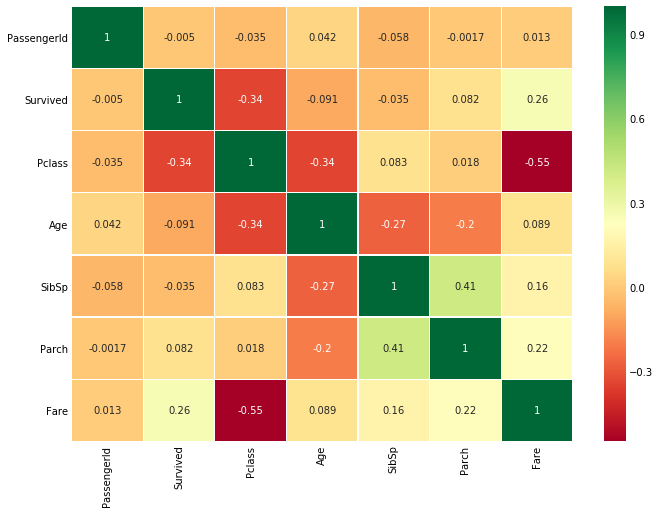

In [44]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2) # data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## Part 2. Feature Engineering and Data Cleaning

Now what is Feature Engineering?

\
Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many rebundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

\
An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age_band

**Problem With Age Feature:**
As I have mentioned earlier that **Age is a continuous feature**, there is a problem with Continuous Variables in Machine Learning Models.


**Eg**:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic. 

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.


In [45]:
data['Age_band'] = 0 # new feature
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [46]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') # checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


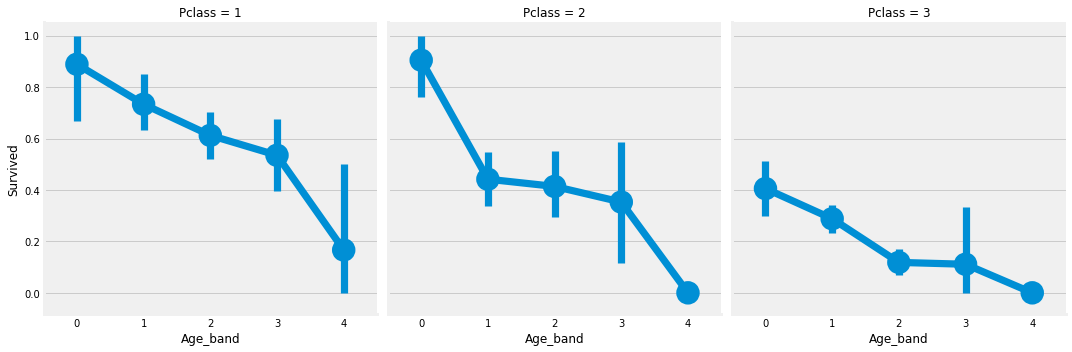

In [47]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

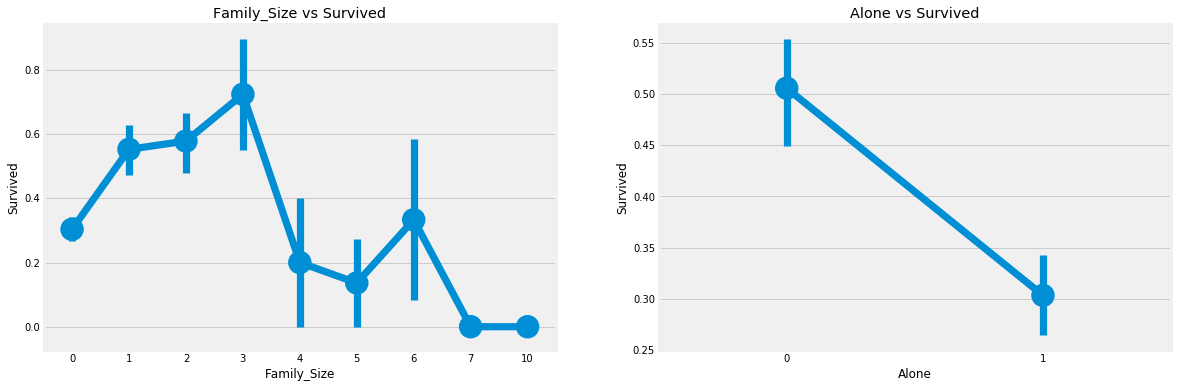

In [48]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] #family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # Alone

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0 means that the passeneger is alone.** Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

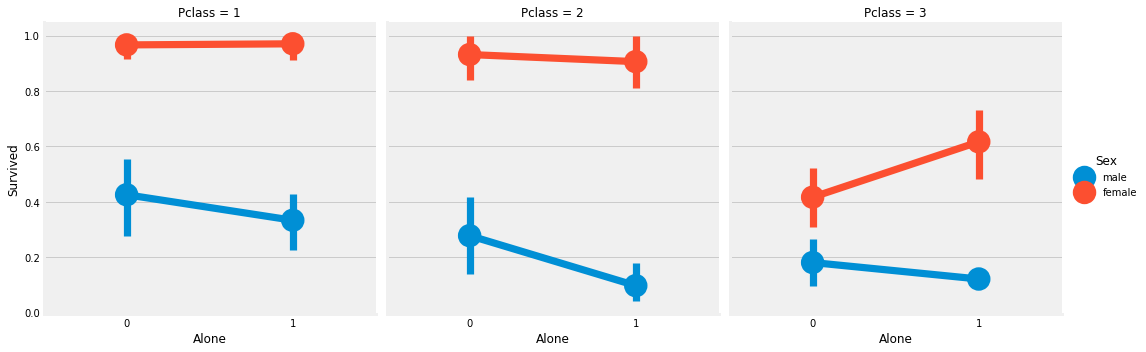

In [49]:
sns.factorplot('Alone', 'Survived', hue='Sex', data=data, col='Pclass')
plt.show()

### Fare Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut.**

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [50]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

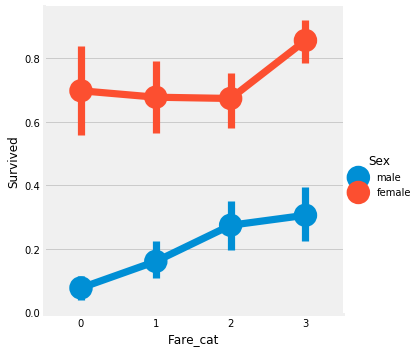

In [52]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

### Convert String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [0]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### Dropping UnNeeded Features

\
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

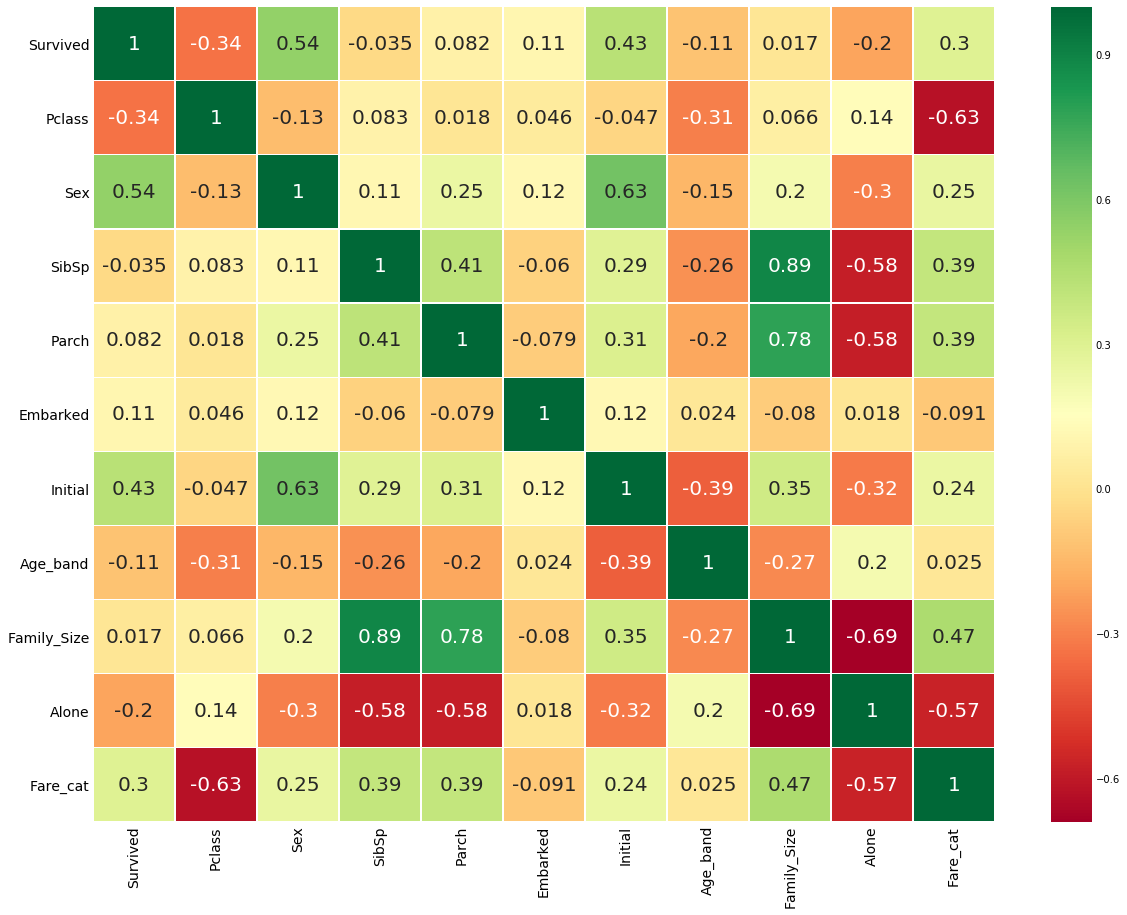

In [54]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

\
1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [0]:
#importing all the rquired ML package
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Navie bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

In [0]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines (rbf-SVM)

In [58]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [62]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [64]:
mdoel = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


### K-Nearest Neighboures(KNN)

In [66]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


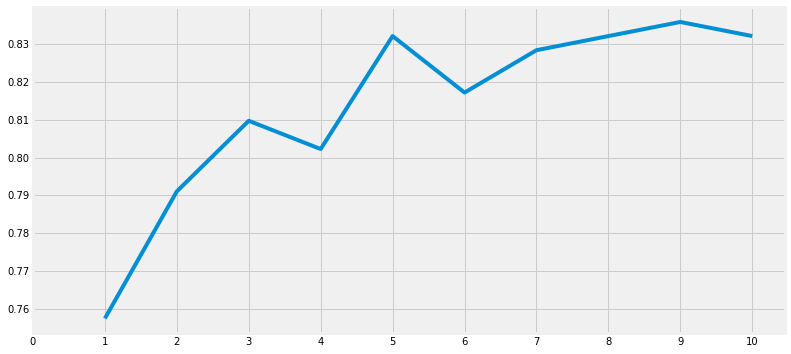

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [68]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

### Gaussian Navie Bayes

In [69]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [71]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8283582089552238


## Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [80]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.811461,0.030803
Naive Bayes,0.801386,0.028999
Random Forest,0.813733,0.036397


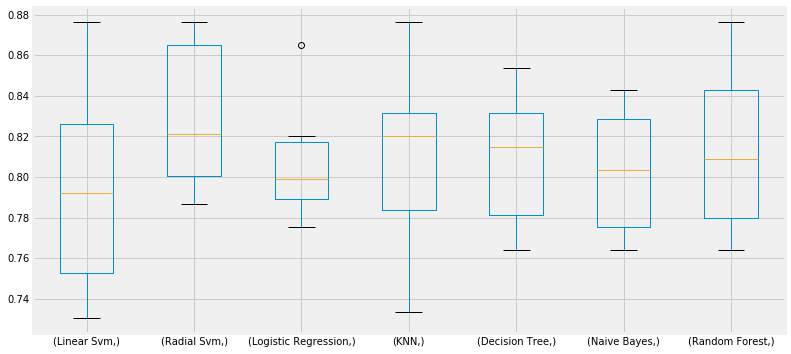

In [81]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

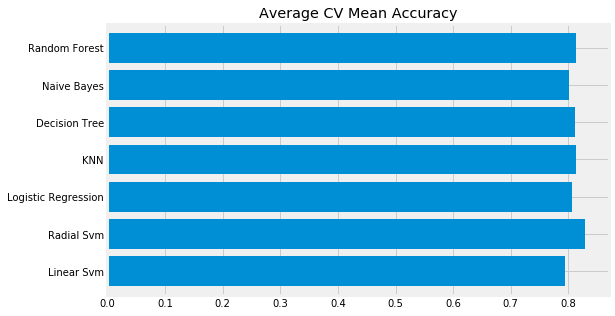

In [82]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

### Confusion Matrix

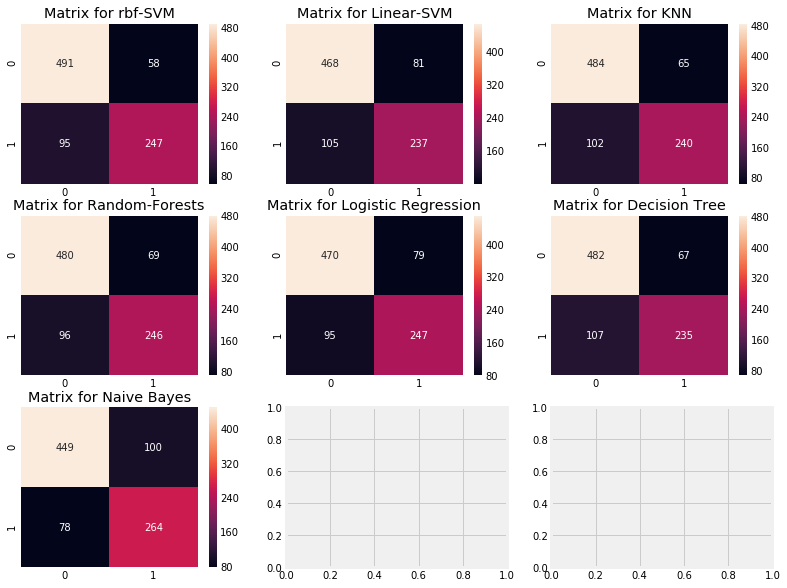

In [84]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

####Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

####Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

#### SVM

In [87]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   23.3s finished


#### Random Forests

In [88]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   38.4s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


## Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

### Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [89]:
from sklearn.ensemble import VotingClassifier
ensembel_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(kernel='rbf', probability=True, C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensembel_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensembel_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')                          
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


### Bagging
Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with smal lvalue of n_neighbours, as small value of n_neighbours.

In [90]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


#### Bagged DecisionTree

In [93]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring ='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


### Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)
The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of our choice.

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting
Here too the weak learner is a Decision Tree.

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [97]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


#### Hyper-Parameter Tuning for AdaBoost

In [98]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.6min finished


### Confusion Matrix for the Best Model

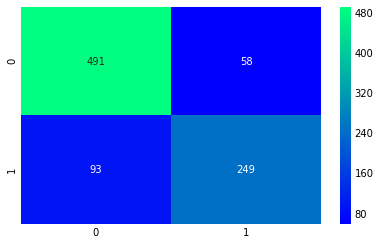

In [99]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

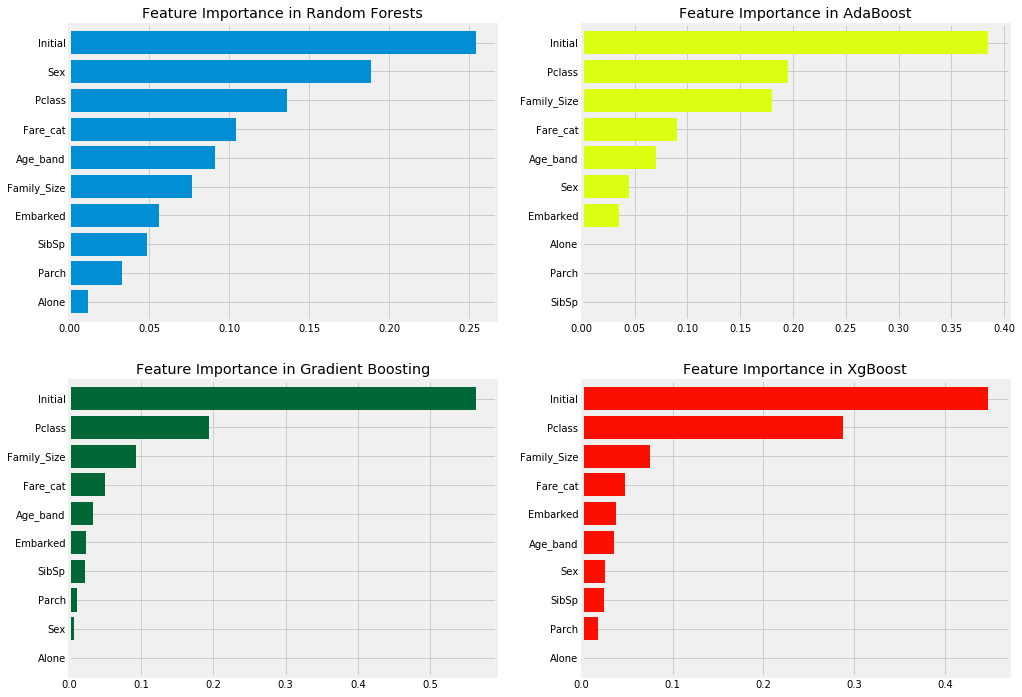

In [101]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#Fd0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()